In [9]:
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.

import numpy as np ### fundamental package for scientific computing with Python

import os ### using operating system dependent functionality

import scipy.stats as stats

import matplotlib.pyplot as plt 

plt.rc("font", size=14)

import seaborn as sns

sns.set(style="white")

sns.set(style="whitegrid", color_codes=True)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import scale

In [10]:
data = pd.read_csv('Trucks.csv')
data.head(10)

,Unnamed: 0,Freq,period,parked,light,collision
0,1,712,0,1,1,0
1,2,613,1,1,1,0
2,3,192,0,1,1,1
3,4,179,1,1,1,1
4,5,2557,0,0,1,0
5,6,2373,1,0,1,0
6,7,10749,0,0,1,1
7,8,9768,1,0,1,1
8,9,634,0,1,0,0
9,10,411,1,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  24 non-null     int64
 1   Freq        24 non-null     int64
 2   period      24 non-null     int64
 3   parked      24 non-null     int64
 4   light       24 non-null     int64
 5   collision   24 non-null     int64
dtypes: int64(6)
memory usage: 1.2 KB


In [11]:
data.isnull().sum()

Unnamed: 0    0
Freq          0
period        0
parked        0
light         0
collision     0
dtype: int64

In [12]:
data.describe()

,Unnamed: 0,Freq,period,parked,light,collision
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,1448.916667,0.500000,0.500000,0.333333,0.500000
std,7.071068,2794.132578,0.510754,0.510754,0.481543,0.510754
min,1.000000,39.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,188.750000,0.000000,0.000000,0.000000,0.000000
50%,12.500000,536.500000,0.500000,0.500000,0.000000,0.500000
75%,18.250000,994.750000,1.000000,1.000000,1.000000,1.000000
max,24.000000,10749.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data['collision'].value_counts()

1    12
0    12
Name: collision, dtype: int64

In [14]:
X = np.asmatrix(data[['Unnamed: 0','Freq','period','parked','light']])



Y = np.asarray(data[['collision']])

In [15]:
clf = LinearDiscriminantAnalysis()

model=clf.fit(X,Y)

model

/Users/divyasarika/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [17]:
pred_class = model.predict(X)

data['Prediction'] = pred_class 

In [18]:
confusion_matrix(Y, pred_class)

array([[8, 4],
       [6, 6]])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



AUC for the Training Data: 0.583


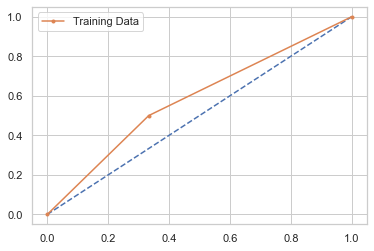

In [21]:
from sklearn import metrics,model_selection
# calculate AUC
auc = metrics.roc_auc_score(Y,pred_class)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y,pred_class)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


## show the plot
plt.legend(loc='best')
plt.show()